In [1]:
import pandas as pd

file_path = 'literature_data.csv'  # 文件路径  
#data = pd.read_csv(file_path, encoding='GB2312', errors='ignore')
with open(file_path, 'r', encoding='gb2312', errors='ignore') as f:  
    content = pd.read_csv(f)
    # 去掉重复行
    # content = content.drop_duplicates() 
    
    # print(content)
    # for row in content.iterrows():  
    #     print(row[1])
    
    #将点评人数和分数规范化 
    for i in range(content.shape[0]):
        if len(content['number'][i]) > 3:
            content['number'][i] = content['number'][i][:-3]
            if (content['number'][i].endswith('万')):
                content['number'][i] = int(float(content['number'][i][:-1])*10000)
            content['number'][i] = int(content['number'][i])
        if len(content['mark'][i]) > 3 and not content['mark'][i].startswith("评"):
            content['mark'][i] = content['mark'][i][:-1]
            content['mark'][i] = float(content['mark'][i])
    content['number'] = content['number'].astype('int32')
    content['mark'] = content['mark'].astype('float')
    print(content)
    
# data['combined'] = data.iloc[:, :2].values.flatten()  # 将前两列拼接成一个新列
# result = data.drop_duplicates(subset='combined')  # 根据新列去重
# result = result.drop(columns='combined')  # 可选：删除拼接列

# output_file_path = 'history.csv'  # 将文件路径替换为你想要保存的去重后的CSV文件路径  
# result.to_csv(output_file_path, index=False)  # 将去重后的数据保存为新的CSV文件，不包含索引列（可选）

    class                      name             author  number  mark  \
0      文学     中国文学鉴赏辞典大系（套装共17部22册）  上海辞书出版社文学鉴赏辞典编纂中心     213  97.9   
1      历史                     南京大屠杀                张纯如   36000  97.4   
2      哲学                        谈美                朱光潜      43  97.0   
3      文学                    撒哈拉的故事                 三毛    9692  96.8   
4      历史                    启功口述历史               启功口述      92  96.4   
..    ...                       ...                ...     ...   ...   
524    历史              艰难时代：亲历美国大萧条            斯特兹・特克尔     232  62.4   
525    哲学                      逆向思维                 李磊     108  57.4   
526    历史            环球国家地理百科全书：亚洲1                 王越     267  52.4   
527    历史                    我和慈禧太后                 德龄     696  51.0   
528    哲学  逻辑学入门：清晰思考、理性生活的88个逻辑学常识                 格桑     204  41.0   

    publish_time                                            extract  
0        2020年9月  本套装含17部书，共22册。上海辞书出版社举全国相关领域的一流专家学者之力，历时三十余年，囊.

In [2]:

from math import ceil
threshold = ceil(content.shape[0] * 0.02)
best_titles = content.nlargest(threshold,'number')
worst_titles = content.nsmallest(threshold,'number')
# df [[]] 获取 df, [] 获取 series
best_titles_text = "".join(best_titles['name'].values.tolist())
worst_titles_text = "".join(worst_titles['name'].values.tolist())


print(best_titles['name'].values)
print(worst_titles['name'].values)


['明朝那些事儿（全集）' '活着' '长安的荔枝' '追风筝的人' '皮囊' '平凡的世界（全三册）' '白鹿原' '围城'
 '许三观卖血记（第3版）' '杀死一只知更鸟（同名电影原著）' '小王子']
['千面英雄' '资本论（上）' '改革开放口述史' '1844年经济学―哲学手稿' '莫里哀喜剧六种（译文名著文库）' '战国策' '英国通史'
 '地理的故事（英文版）' '心智觉醒：我不介意会发生什么' '六祖坛经修心课：不抑郁的活法' '大众哲学']


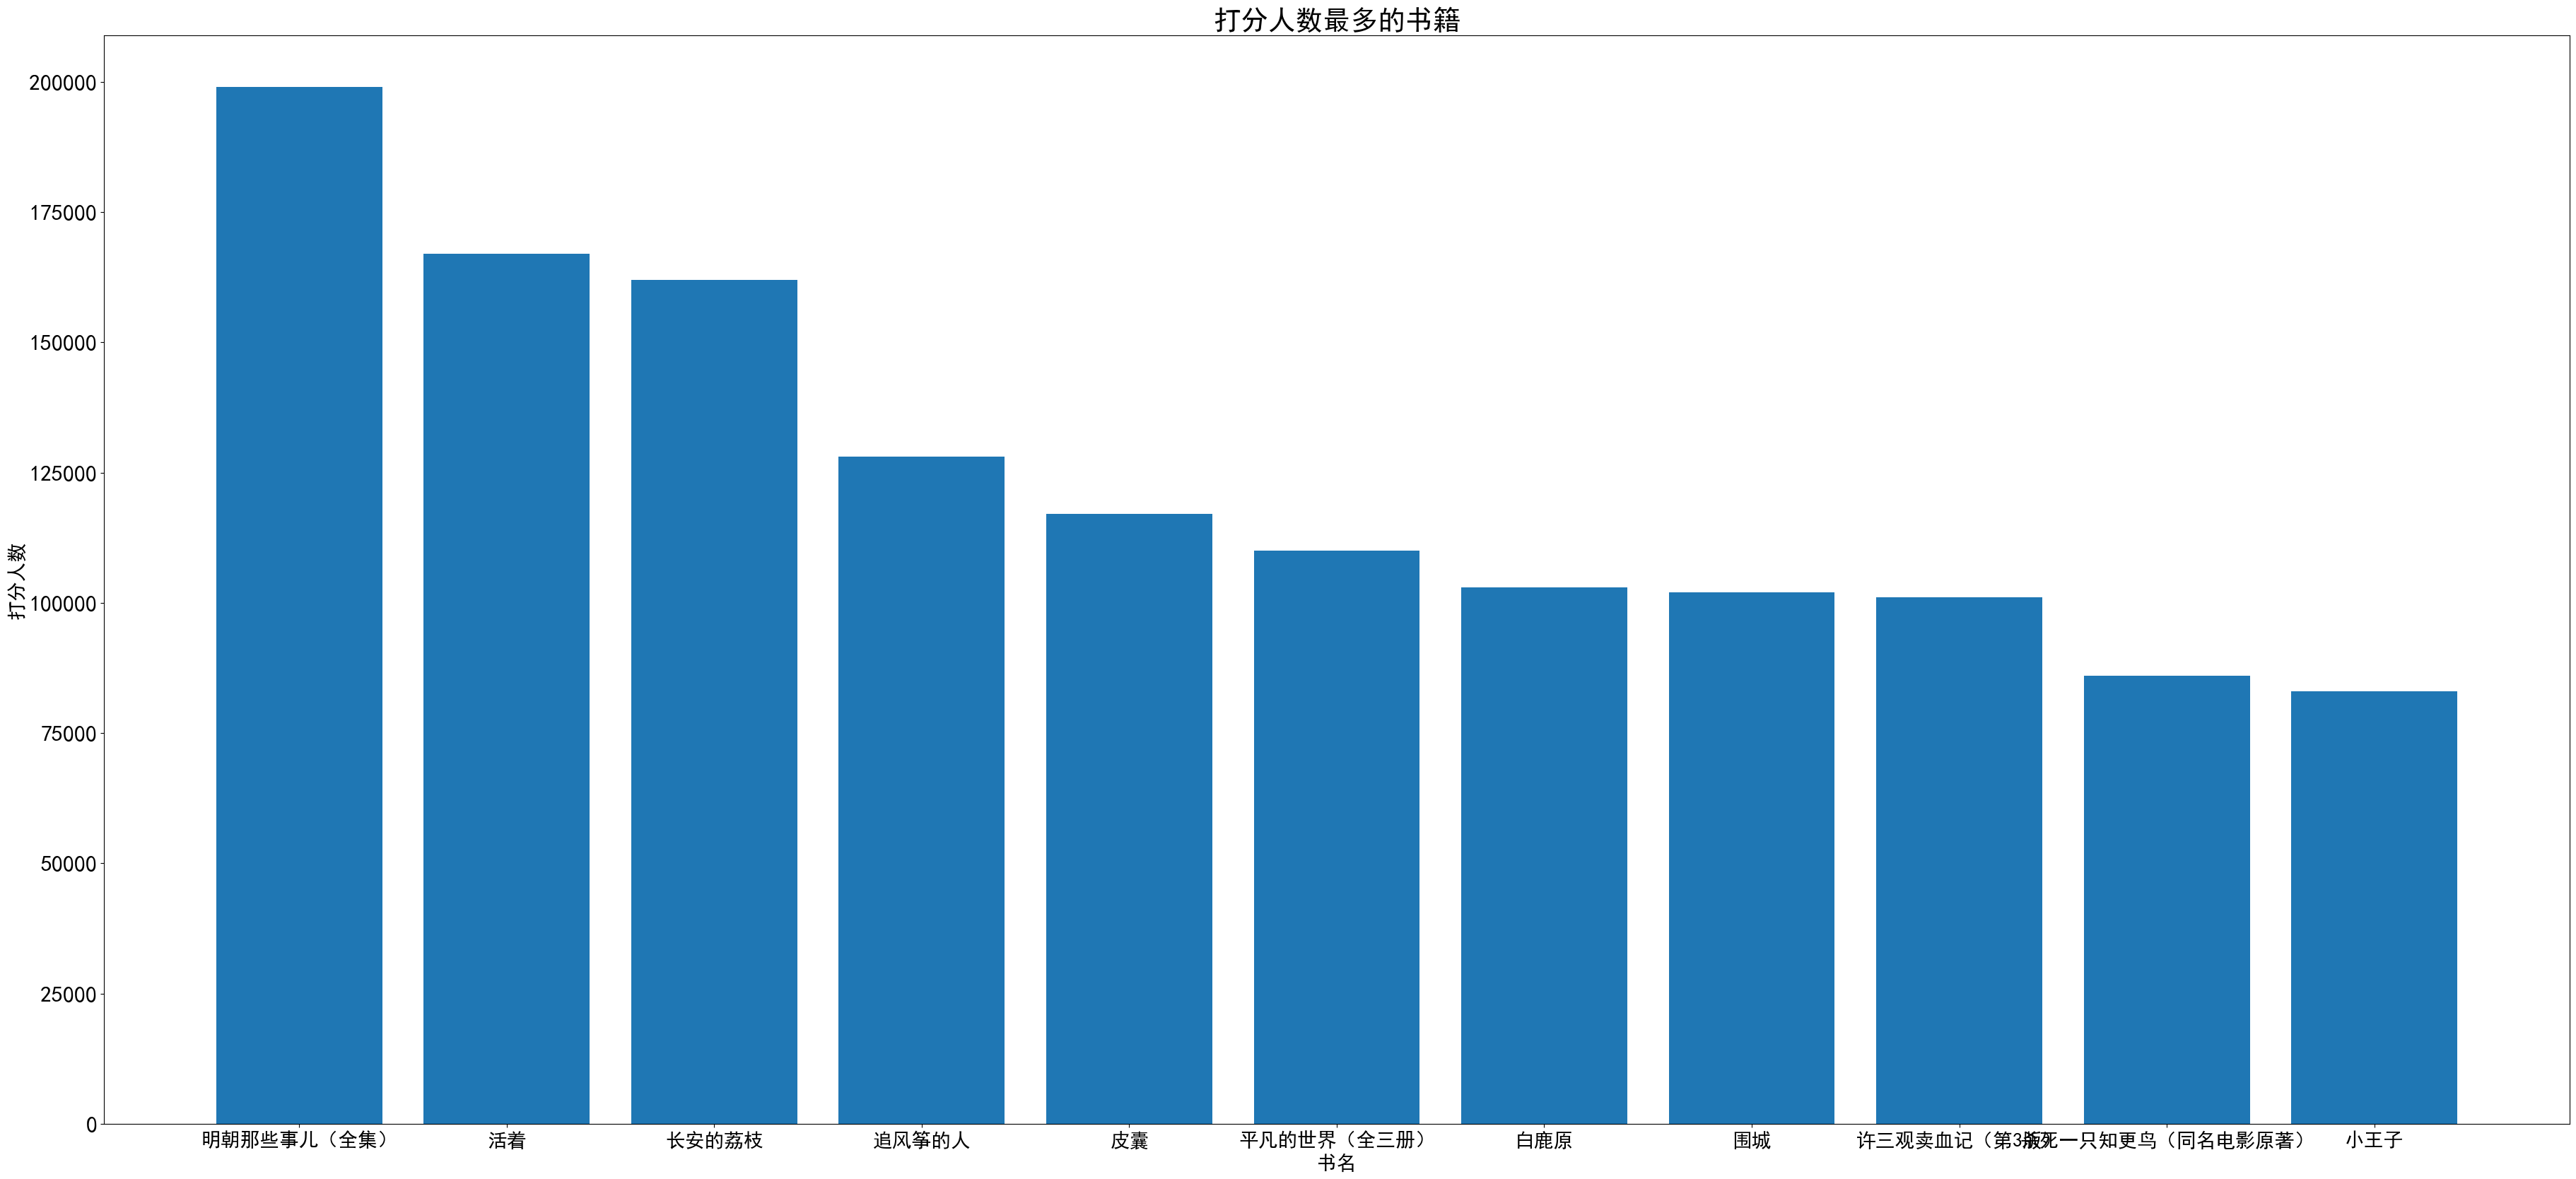

In [3]:
import matplotlib.pyplot as plt
# 设置中文字体和负号正常显示
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(45,20))
plt.bar(best_titles['name'].values,best_titles['number'])
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 23) 
plt.ylabel('打分人数',fontsize = 20)
plt.xlabel('书名',fontsize = 20)
plt.title("打分人数最多的书籍",fontsize = 28)
plt.show()

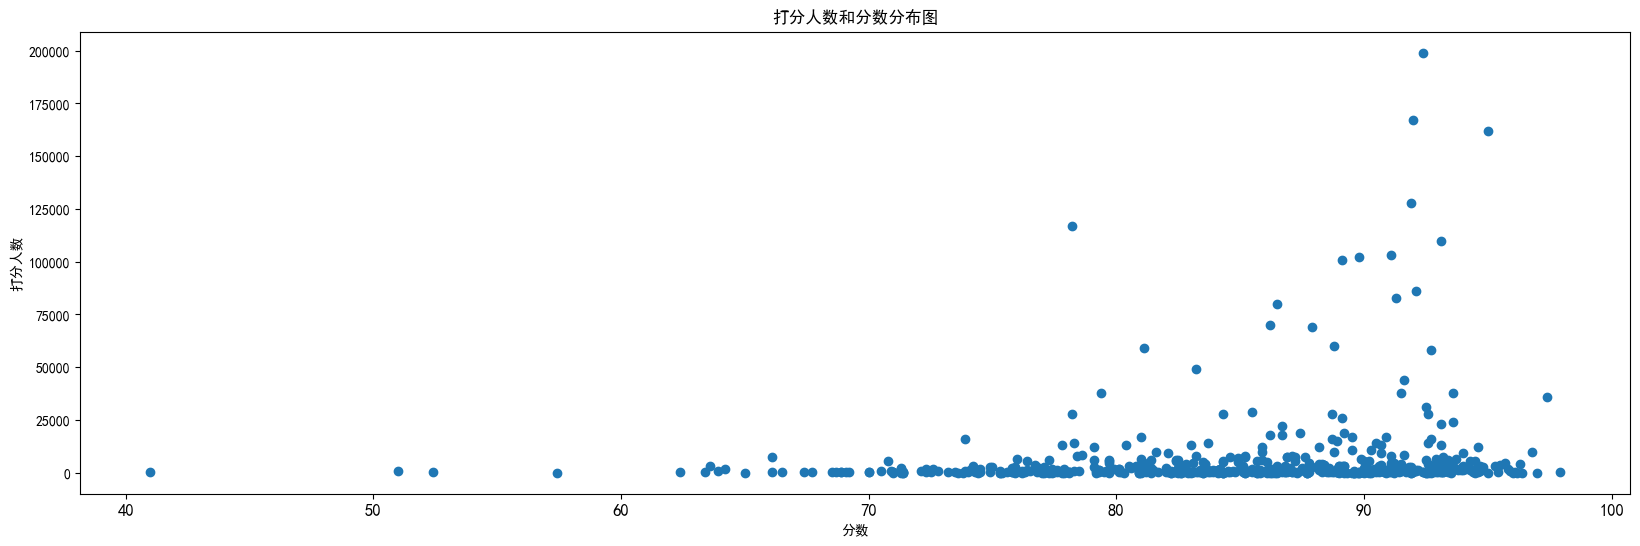

In [4]:
import matplotlib
from scipy import optimize
import numpy as np

# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
read_num = content['number'].values.tolist()
praise_num = content['mark'].values.tolist()
plt.figure(figsize=(20,6))
plt.ylabel('打分人数')
plt.xlabel('分数')
plt.xticks(fontsize=12)
# xticks = np.arange(min(praise_num), max(praise_num), 0.5)  # 设置刻度的位置，步长为0.5  
# plt.xticks(xticks, rotation=45)  # 设置刻度的位置和旋转角度  
plt.title('打分人数和分数分布图')
plt.scatter(y=read_num,x=praise_num,label="实际值")

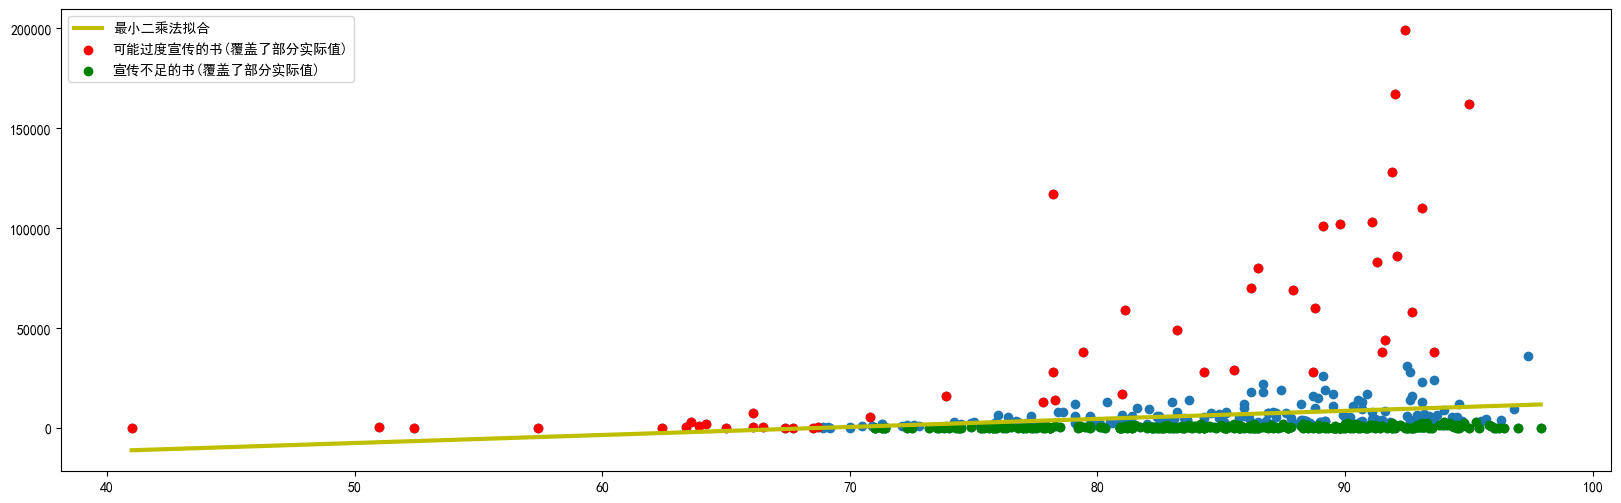

In [5]:
from sklearn.linear_model import LinearRegression
from scipy import vectorize
import numpy as np

lr = LinearRegression()
lr.fit(np.array(praise_num).reshape(-1,1),np.array(read_num).reshape(-1,1))
x1 = np.array(praise_num).reshape(-1,1)
y1 = lr.predict(x1)
# 对 np.array 每个元素取整操作，应用scipy.vectorize()函数
y1 = vectorize(lambda x:ceil(x))(y1)
plt.figure(figsize=(20,6))
plt.scatter(x1,np.array(read_num).reshape(-1,1))
plt.plot(x1,y1,"y",linewidth=3,label="最小二乘法拟合")

# 增加一列
content['预测number'] = y1

should_better_title_data = content[content['number']>content['预测number']*(3.3)]
title_pie_data = content[content['number']<content['预测number']*(0.3)]

sbtd_x = should_better_title_data['mark'].values.tolist()
sbtd_y = should_better_title_data['number'].values.tolist()
plt.scatter(x=sbtd_x,y=sbtd_y,label="可能过度宣传的书(覆盖了部分实际值)",c='red')

tpd_x = title_pie_data['mark'].values.tolist()
tpd_y = title_pie_data['number'].values.tolist()
plt.scatter(x=tpd_x,y=tpd_y,label="宣传不足的书(覆盖了部分实际值)",c='green')

plt.legend()
plt.show()

In [6]:
should_better_title_data.to_excel("宣传到位的书籍.xlsx",index=False)

title_pie_data.to_excel("有待加大推广力度的书籍.xlsx",index=False)

利用TF-IDF计算书籍简介的相似度

In [7]:
import numpy as np 
import pandas as pd
import math
import jieba

#1.声明文档 分词 去重合并
wordSet = set()
with open('StopWords.txt', 'r',encoding='utf-8',errors='ignore') as f:
    stopwords = f.read().split('\n')
    print(stopwords)

spliti = []
for i in range(content.shape[0]):
    print(content["extract"][i])
    spliti.append([])
    spliti[i] = jieba.lcut(content["extract"][i])
    # 剔除停用词
    for word in spliti[i]:
        if word in stopwords:
            spliti[i].remove(word)

    # print(spliti[i])
    wordSet = wordSet.union(spliti[i]) #通过set去重来构建词库
print(wordSet)




#2.统计词项tj在文档Di中出现的次数，也就是词频。
def computeTF(wordSet,split):
    tf = dict.fromkeys(wordSet, 0)
    for word in split:
        tf[word] += 1
    return tf

tf = []
for i in range(content.shape[0]):
    tf.append([])
    tf[i] = computeTF(wordSet, spliti[i])
    # print(tf[i])


#3.计算逆文档频率IDF
def computeIDF(tfList): 
    idfDict = dict.fromkeys(tfList[0],0) #词为key，初始值为0
    N = len(tfList)  #总文档数量 
    for tf in tfList: # 遍历字典中每一篇文章
        for word, count in tf.items(): #遍历当前文章的每一个词
            if count > 0 : #当前遍历的词语在当前遍历到的文章中出现
                idfDict[word] += 1 #包含词项tj的文档的篇数df+1  
    for word, Ni in idfDict.items(): #利用公式将df替换为逆文档频率idf
        idfDict[word] = math.log10(N/Ni)  #N,Ni均不会为0
    return idfDict   #返回逆文档频率IDF字典
idfs = computeIDF([tf1, tf2, tf3])
print('idfs:\n',idfs)

#4.计算tf-idf(term frequency–inverse document frequency)
def computeTFIDF(tf, idfs): #tf词频,idf逆文档频率
    tfidf = {}
    for word, tfval in tf.items():
        tfidf[word] = tfval * idfs[word]
    return tfidf
tfidf1 = computeTFIDF(tf1, idfs)
tfidf2 = computeTFIDF(tf2, idfs)
tfidf3 = computeTFIDF(tf3, idfs)
tfidf = pd.DataFrame([tfidf1, tfidf2, tfidf3])
print(tfidf)

#5.查询与文档Q最相似的文章
q = 'gold silver truck' #查询文档Q
split_q = q.split(' ')   #分词
tf_q = computeTF(wordSet,split_q) #计算Q的词频
tfidf_q = computeTFIDF(tf_q, idfs) #计算Q的tf_idf(构建向量)
ans = pd.DataFrame([tfidf1, tfidf2, tfidf3, tfidf_q])
print(ans)

#6.计算Q和文档Di的相似度（可以简单地定义为两个向量的内积）
print('Q和文档D3的相似度SC(Q, D3) :', (ans.loc[2,:]*ans.loc[3,:]).sum())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\24116\AppData\Local\Temp\jieba.cache


['\ufeff!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '--', '.', '..', '...', '......', '...................', './', '.一', '.数', '.日', '/', '//', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '://', '::', ';', '<', '=', '>', '>>', '?', '@', 'A', 'Lex', '[', '\\', ']', '^', '_', '`', 'exp', 'sub', 'sup', '|', '}', '~', '~~~~', '·', '×', '×××', 'Δ', 'Ψ', 'γ', 'μ', 'φ', 'φ．', 'В', '—', '——', '———', '‘', '’', '’‘', '“', '”', '”，', '…', '……', '…………………………………………………③', '′∈', '′｜', '℃', 'Ⅲ', '↑', '→', '∈［', '∪φ∈', '≈', '①', '②', '②ｃ', '③', '③］', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '──', '■', '▲', '\u3000', '、', '。', '〈', '〉', '《', '》', '》），', '」', '『', '』', '【', '】', '〔', '〕', '〕〔', '㈧', '一', '一.', '一一', '一下', '一个', '一些', '一何', '一切', '一则', '一则通过', '一天', '一定', '一方面', '一旦', '一时', '一来', '一样', '一次', '一片', '一番', '一直', '一致', '一般', '一起', '一转眼', '一边', '一面', '七', '万一', '三', '三天两头', '三番两次', '三番五次', '上', '上下', '上升', '上去', '上来', '上述', '上面', '下', '下列', '下去', '下来', '下面', '不', '不一', 

Loading model cost 0.732 seconds.
Prefix dict has been built successfully.


一部令国人流泪的书 1937年12月，日军攻入中国古都南京。几周之内，30多万中国平民和士兵遭到有计划地强暴、折磨和屠杀――死亡人数超过广岛和长崎原子弹爆炸遇难人数的总和。 张纯如不仅在书中详述了日军疯狂暴行的细节，而且分析了在军国主义文化背景下成长起来的日本士兵对人类生命的漠视。张纯如对南京大屠杀的幸存者进行了大量采访，并首次发掘了许多重要文献。全书先是从日本士兵、军官为什么完全脱离了人类基本的行为规范，日本学校和教科书从心理层面向学生灌输对中国人民的仇恨和蔑视，以及高度军事化的教育体制等多个方面阐述了南京大屠杀发生的根源性原因。
《谈美》写于1932年，是继《给青年的十二封信》之后的“第十三封信”，开明书店出版本书时，副题为《给青年的第十三封信》。《谈美》虽有《文艺心理学》的“缩写本”之称，但却并非《文艺心理学》的节略本，而是自成一体。在书中，朱光潜先生没有一丝掉书袋的气味，竟如同与一位亲密的朋友对话一般明白晓畅。作者认为“人心之怀，由于‘未能免俗’”，《谈美》的创作则只为一个目的，就是“研究如何‘免俗’”。朱自清先生为《谈美》作序时评价到：在这本书种，“孟实先生引读者由艺术走入人生，又将人生纳入艺术之中”。
传奇作家三毛代表作，华语文学绕不开的名作，无数人心中的华语散文“天花板”。豆瓣超42万读者9.2高分推荐，稳居豆瓣读书总榜前15！崭新修订，优选篇目，完整呈现三毛撒哈拉时期的生活与创作。一千种生活可能，一本书一网打尽！带你逃离庸常，给你“闯”的勇气，“永远在路上”永远让人着迷！无数人梦与远方的起点，无数人闪闪发光的开端！齐豫、林青霞、史航、贾平凹、饶雪漫、鲁豫、寂地、陈妍希、姚晨……各界名人都在读三毛！ 记录三毛一生中快乐的高光时刻，纪念生命中一去不返的“黄金时代”！
本书是启功九十岁以后的口述，经启功的弟子、北京师范大学教授赵仁整理而成。在本书中，启功回顾了自己一生的经历，主要内容有启功的家族、启功的童年和求学之路、启功与辅仁大学、启功与师大和启功的学艺回顾。他的一生并没有投入到惊天动地的政治斗争的最前沿和时代旋涡的最中心，过的基本是书斋的生活。但他特殊的家庭背景、他特殊的生活经历、他在20世纪中国文化史中的特殊才能和地位，使他的书斋生活更为独特、精彩。从这里我们可以瞥见现当代很多历史的痕迹，也可以窥见当时著名文艺沙龙和著名文人的活动踪影。这些是其他人很

NameError: name 'tf1' is not defined